In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Loading the fashion-mnist pre-shuffled train data and test data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


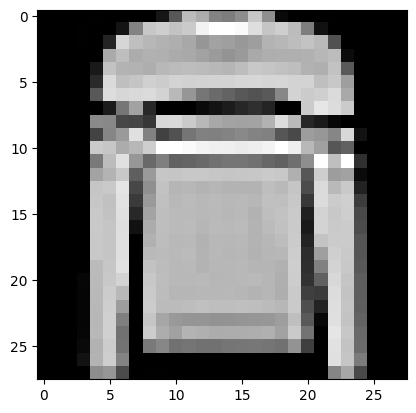

In [18]:
# Setting an image index to visualize 
img_index = 5

# Visualization
plt.imshow(x_train[img_index], cmap='gray')

In [19]:
#Data normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [20]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [21]:
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

In [22]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [23]:
#Model Training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(
    filepath='model.best.weights.h5', 
    verbose=1,
    save_best_only=True,
    save_weights_only=True  
)


In [29]:

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6900 - loss: 0.8342  
Epoch 1: val_loss improved from inf to 0.38831, saving model to model.best.weights.h5
860/860 ━━━━━━━━━━━━━━━━━━━━ 97s 76ms/step - accuracy: 0.6901 - loss: 0.8339 - val_accuracy: 0.8628 - val_loss: 0.3883
Epoch 2/10
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8441 - loss: 0.4320 
Epoch 2: val_loss improved from 0.38831 to 0.33285, saving model to model.best.weights.h5
860/860 ━━━━━━━━━━━━━━━━━━━━ 64s 75ms/step - accuracy: 0.8441 - loss: 0.4320 - val_accuracy: 0.8794 - val_loss: 0.3329
Epoch 3/10
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8599 - loss: 0.3826  
Epoch 3: val_loss improved from 0.33285 to 0.30350, saving model to model.best.weights.h5
860/860 ━━━━━━━━━━━━━━━━━━━━ 56s 65ms/step - accuracy: 0.8599 - loss: 0.3826 - val_accuracy: 0.8928 - val_loss: 0.3035
Epoch 4/10
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8693 - loss: 0.3590 
Epoch 4: val_loss impro

In [30]:
model.load_weights('model.best.weights.h5')

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9071000218391418


In [32]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 


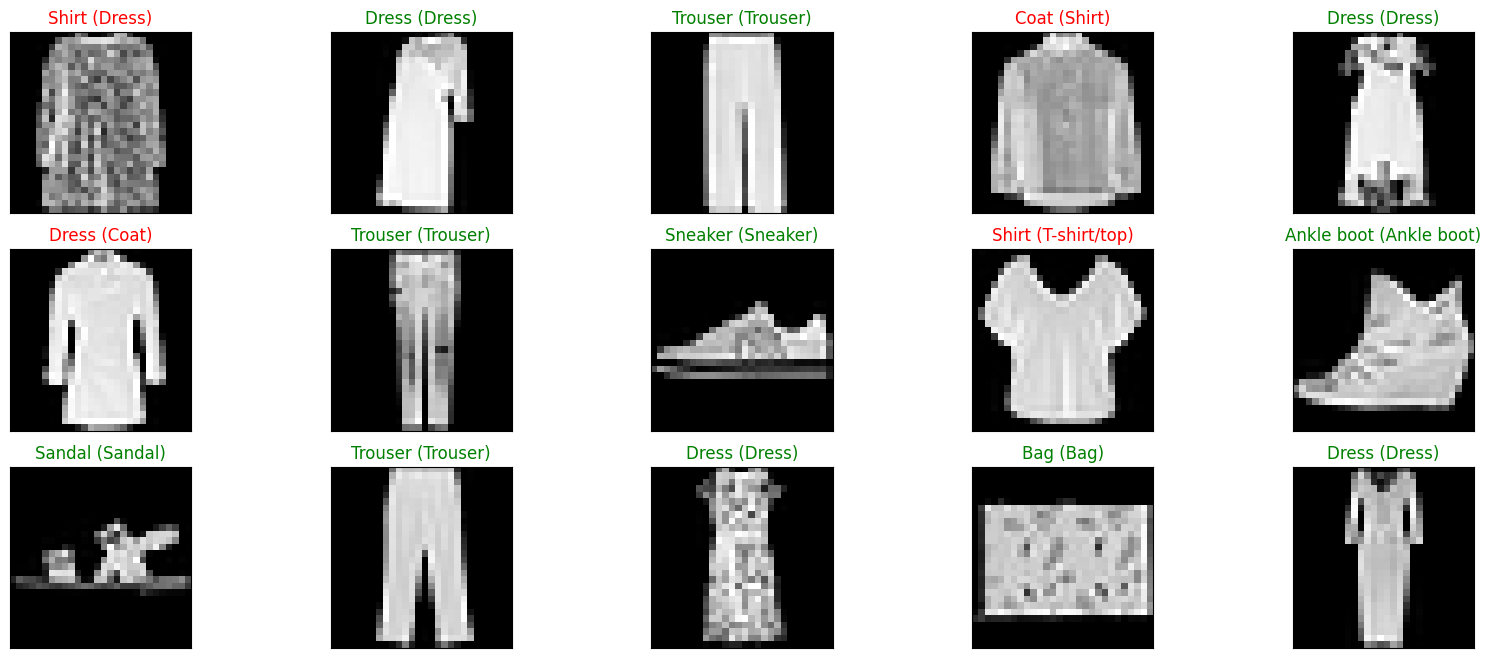

In [34]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]),cmap='gray')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_hat, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

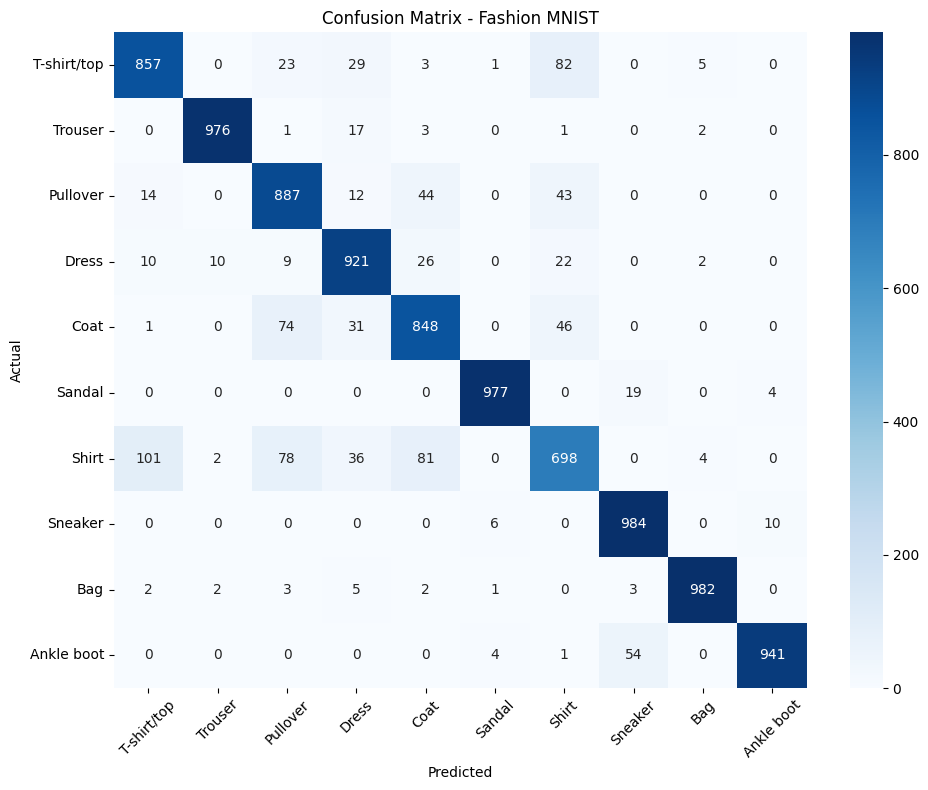

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=fashion_mnist_labels,
            yticklabels=fashion_mnist_labels)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Fashion MNIST')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=fashion_mnist_labels)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.83      0.89      0.85      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.84      0.85      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.78      0.70      0.74      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

